In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

players_df = '/content/drive/MyDrive/Trabajo_Final_Coder_Ciencia_1/players_21.csv'
df = pd.read_csv(players_df)
players_df = pd.read_csv(players_df)

# Descripción de Variables

# sofifa_id: Identificador único del jugador en la base de datos de FIFA.
# player_url: URL del perfil del jugador en el sitio de sofifa.
# short_name: Nombre corto del jugador.
# long_name: Nombre completo del jugador.
# age: Edad del jugador.
# dob: Fecha de nacimiento del jugador.
# height_cm: Altura del jugador en centímetros.
# weight_kg: Peso del jugador en kilogramos.
# nationality: Nacionalidad del jugador.
# club_name: Nombre del club al que pertenece el jugador.
# lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb: Habilidades del jugador en diferentes posiciones del campo"""

# siendo estas ultimas:
# LWB (Left Wing Back): Calificación del jugador como lateral izquierdo.
# LDM (Left Defensive Midfielder): Calificación del jugador como mediocampista defensivo izquierdo.
# CDM (Central Defensive Midfielder): Calificación del jugador como mediocampista defensivo central.
# RDM (Right Defensive Midfielder): Calificación del jugador como mediocampista defensivo derecho.
# RWB (Right Wing Back): Calificación del jugador como lateral derecho.
# LB (Left Back): Calificación del jugador como defensor izquierdo.
# LCB (Left Center Back): Calificación del jugador como defensor central izquierdo.
# CB (Center Back): Calificación del jugador como defensor central.
# RCB (Right Center Back): Calificación del jugador como defensor central derecho.
# RB (Right Back): Calificación del jugador como defensor derecho.

In [4]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [5]:
num_registros1 = df.shape[0]
num_registros1

18944

In [6]:
df.describe().round(2)

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.00,18944.00,18944.00,18944.00,18719.00,18944.00,18944.00,1.894400e+04,18944.00,18944.00,...,18944.00,18944.00,0.0,18944.00,18944.00,18944.00,18944.00,18944.00,18944.00,18944.00
mean,226242.40,25.23,181.19,75.02,1.36,65.68,71.09,2.224813e+06,8675.85,1.09,...,48.05,57.98,NaN,47.58,45.55,16.45,16.24,16.10,16.23,16.55
std,27171.09,4.70,6.83,7.06,0.74,7.00,6.11,5.102486e+06,19654.77,0.36,...,15.67,12.12,NaN,21.40,20.95,17.58,16.85,16.52,17.02,17.88
min,41.00,16.00,155.00,50.00,1.00,47.00,47.00,0.000000e+00,0.00,1.00,...,6.00,12.00,NaN,5.00,4.00,1.00,1.00,1.00,1.00,1.00
25%,210030.50,21.00,176.00,70.00,1.00,61.00,67.00,3.000000e+05,1000.00,1.00,...,38.75,50.00,NaN,27.00,24.00,8.00,8.00,8.00,8.00,8.00
50%,232314.50,25.00,181.00,75.00,1.00,66.00,71.00,6.500000e+05,3000.00,1.00,...,49.00,59.00,NaN,55.00,52.00,11.00,11.00,11.00,11.00,11.00
75%,246760.25,29.00,186.00,80.00,1.00,70.00,75.00,1.800000e+06,7000.00,1.00,...,60.00,66.00,NaN,65.00,63.00,14.00,14.00,14.00,14.00,14.00
max,258970.00,53.00,206.00,110.00,4.00,93.00,95.00,1.055000e+08,560000.00,5.00,...,92.00,96.00,NaN,93.00,90.00,90.00,92.00,93.00,91.00,90.00


In [7]:
df.sample(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
5171,202220,https://sofifa.com/player/202220/cj-sapong/210002,C. Sapong,Charles Kwabena Sapong,31,1988-12-27,185,84,United States,Chicago Fire,...,54+2,54+2,54+2,54+2,54+2,53+2,54+2,54+2,54+2,53+2
9487,232916,https://sofifa.com/player/232916/keijiro-ogawa...,K. Ogawa,小川 庆治朗,27,1992-07-14,170,65,Japan,Vissel Kobe,...,60+2,58+2,58+2,58+2,60+2,58+2,54+2,54+2,54+2,58+2
11515,255078,https://sofifa.com/player/255078/takuma-hamasa...,T. Hamasaki,浜崎 拓磨,27,1993-02-17,175,70,Japan,Vegalta Sendai,...,61+2,60+2,60+2,60+2,61+2,62+2,62+2,62+2,62+2,62+2
8589,239353,https://sofifa.com/player/239353/navajo-bakboo...,N. Bakboord,Navajo Bakboord,21,1999-01-29,177,74,Netherlands,Heracles Almelo,...,63+2,61+2,61+2,61+2,63+2,64+2,62+2,62+2,62+2,64+2
2961,212107,https://sofifa.com/player/212107/adis-jahovic/...,A. Jahović,Adis Jahović,33,1987-03-18,191,90,North Macedonia,Antalyaspor,...,46+2,47+2,47+2,47+2,46+2,44+2,48+2,48+2,48+2,44+2


In [8]:
# prompt: necesito conocer todas las columnas de mi dataset

# Get the list of column names
column_names = df.columns.tolist()

# Print the list of column names
print(column_names)


['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_ba

In [ ]:
# prompt: quiero saber las diversas cantidades  que existen en la columna "team_position"

df['team_position'].value_counts()


team_position
SUB    8065
RES    3163
GK      681
LCB     681
RCB     681
RB      553
LB      553
ST      452
LCM     425
RCM     425
RM      420
LM      420
CAM     286
RDM     248
LDM     248
RS      224
LS      224
CDM     181
RW      170
LW      170
CB      128
LWB      78
RWB      78
CM       76
LAM      25
RAM      25
CF       13
LF       13
RF       13
Name: count, dtype: int64

In [ ]:
# Crear un nuevo DataFrame seleccionando solo las columnas deseadas
selected_columns = [
     'short_name', 'age', 'nationality', 'height_cm', 'weight_kg',
    'club_name', 'overall', 'potential', 'value_eur',
     'international_reputation','work_rate', 'dribbling', 'defending', 'physic', 'gk_diving', 'team_position'
]

selected_data = df[selected_columns]

# Filtrar y descartar jugadores que sean SUB o RES
filtered_data = selected_data[(df['team_position'] != 'SUB') & (df['team_position'] != 'RES') & (df['club_name'].notna())]

# Mostrar las primeras filas del nuevo DataFrame
filtered_data.sample(20)

,short_name,age,nationality,height_cm,weight_kg,club_name,overall,potential,value_eur,international_reputation,work_rate,dribbling,defending,physic,gk_diving,team_position
6840,M. Trapp,28,Germany,191,87,VfL Osnabrück,68,69,875000,1,Medium/Medium,56.0,68.0,74.0,NaN,LCB
15443,I. Stoica,32,Romania,186,83,FC Hermannstadt,60,60,130000,1,Low/High,34.0,59.0,75.0,NaN,LCB
578,A. Schwolow,28,Germany,190,84,Hertha BSC,79,80,10500000,1,Medium/Medium,NaN,NaN,NaN,78.0,GK
18349,G. Popovic,16,Australia,188,80,Perth Glory,52,70,100000,1,High/Medium,51.0,21.0,62.0,NaN,RS
1933,C. Biraghi,27,Italy,185,78,Fiorentina,75,75,7000000,1,Medium/Medium,75.0,73.0,70.0,NaN,LM
16542,M. Popovic,23,Australia,185,80,Macarthur FC,58,62,170000,1,High/Low,59.0,18.0,65.0,NaN,LM
1838,M. Tekdemir,32,Turkey,178,68,Medipol Başakşehir FK,75,75,4400000,1,Medium/High,70.0,74.0,73.0,NaN,RDM
8294,A. Mateiu,30,Romania,175,74,Universitatea Craiova,67,67,625000,1,Medium/Medium,70.0,61.0,73.0,NaN,CDM
1232,G. Simeone,24,Argentina,181,81,Cagliari,76,81,10500000,2,High/High,76.0,39.0,71.0,NaN,ST
5618,I. Ljubić,23,Austria,184,75,SK Sturm Graz,69,75,1300000,1,Medium/Medium,68.0,66.0,69.0,NaN,CDM


In [ ]:
# Contar valores NaN por columna
nan_counts = filtered_data.isna().sum()

# Imprimir los resultados
nan_counts

short_name                     0
age                            0
nationality                    0
height_cm                      0
weight_kg                      0
club_name                      0
overall                        0
potential                      0
value_eur                      0
international_reputation       0
work_rate                      0
dribbling                    681
defending                    681
physic                       681
gk_diving                   6810
team_position                  0
dtype: int64

In [ ]:
# prompt: quiero que los valores NaN en la columna dribbling tomen el valor de 10

filtered_data['dribbling'].fillna(10, inplace=True)


In [ ]:
num_registros2 = filtered_data.shape[0]
num_registros2

7491

In [ ]:
model_select_columns = [ 'dribbling', 'value_eur', 'team_position' ]
model_filtered_data = filtered_data[model_select_columns]
model_filtered_data

,dribbling,value_eur,team_position
0,95.0,67500000,CAM
1,89.0,46000000,LS
2,10.0,75000000,GK
3,85.0,80000000,ST
4,94.0,90000000,LW
...,...,...,...
18884,53.0,25000,RS
18919,44.0,40000,ST
18920,44.0,40000,RCM
18933,42.0,45000,RCM


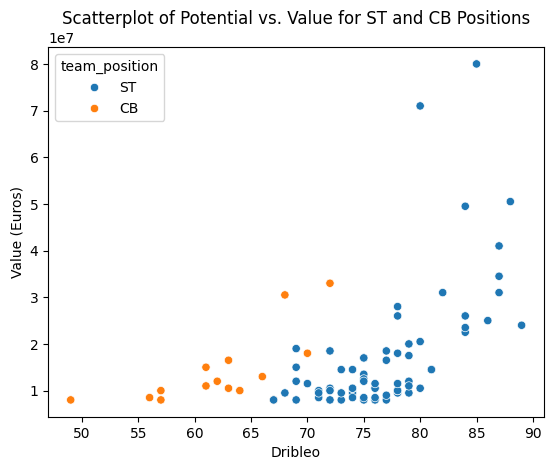

In [ ]:
# prompt: quiero dibujar un scatterplot con el model_filtered_data tomando solo los ST y CB de la columna team_position

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for ST and CB positions
st_gk_data = filtered_data_subset[filtered_data_subset['team_position'].isin(['ST', 'CB']) ]

# Create a scatterplot
sns.scatterplot(x='dribbling', y='value_eur', data=st_gk_data, hue='team_position')

# Add labels and title
plt.xlabel('Dribleo')
plt.ylabel('Value (Euros)')
plt.title('Scatterplot of Potential vs. Value for ST and CB Positions')

# Show the plot
plt.show()


In [ ]:
st_gk_data.sample(20)

,dribbling,value_eur,team_position
677,81.0,14500000,ST
362,72.0,18500000,ST
868,74.0,10500000,ST
196,84.0,23500000,ST
1155,72.0,8000000,ST
713,81.0,14500000,ST
462,69.0,15000000,ST
318,74.0,9500000,ST
339,61.0,15000000,CB
821,78.0,10000000,ST


In [ ]:
# prompt: quiero adicionar un filtro en la columna value_eur que descarte los valores inferiores a 1500000 y actualizar la variable st_gk_data

st_gk_data = st_gk_data[st_gk_data['value_eur'] >= 3000000]
st_gk_data

,dribbling,value_eur,team_position
3,85.0,80000000,ST
21,80.0,71000000,ST
45,88.0,50500000,ST
55,72.0,33000000,CB
61,78.0,28000000,ST
...,...,...,...
3855,70.0,3700000,ST
3932,68.0,3300000,ST
3958,70.0,3200000,ST
3994,70.0,3100000,ST


In [ ]:
X = st_gk_data [["dribbling","value_eur"]]
y = st_gk_data['team_position']
y


3       ST
21      ST
45      ST
55      CB
61      ST
        ..
1546    ST
1563    ST
1738    ST
1757    ST
2077    ST
Name: team_position, Length: 84, dtype: object

In [ ]:
y = pd.get_dummies(st_gk_data['team_position'])
y

,CB,ST
3,False,True
21,False,True
45,False,True
55,True,False
61,False,True
...,...,...
1546,False,True
1563,False,True
1738,False,True
1757,False,True


In [ ]:
y.drop("ST", axis=1, inplace=True)
y.rename(columns={'CB':"target"}, inplace=True)
y

,target
3,False
21,False
45,False
55,True
61,False
...,...
1546,False
1563,False
1738,False
1757,False


In [ ]:
y = y['target'].values.astype(int)
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier

# Crear la instancia del modelo
clf = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
X2= X.values
y2=y

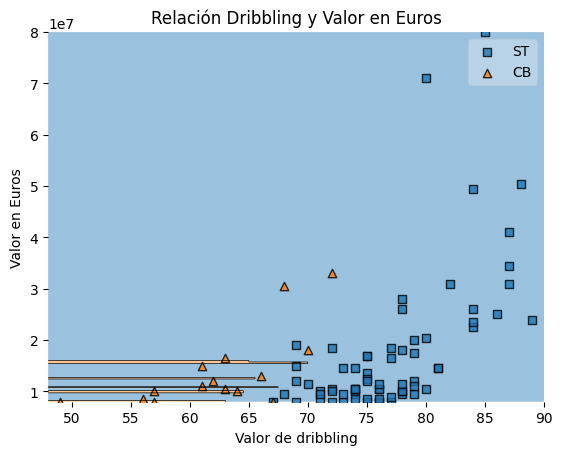

In [ ]:

ax = plot_decision_regions(X2, y2, clf=clf)

plt.xlabel('Valor de dribbling')
plt.ylabel('Valor en Euros')
plt.title('Relación Dribbling y Valor en Euros')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['ST', 'CB'],
           framealpha=0.3, scatterpoints=1)

plt.show()
